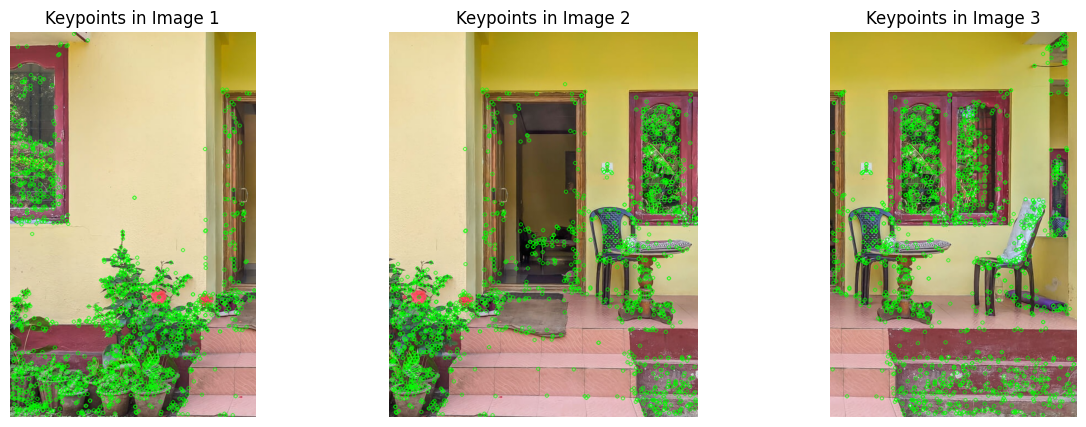

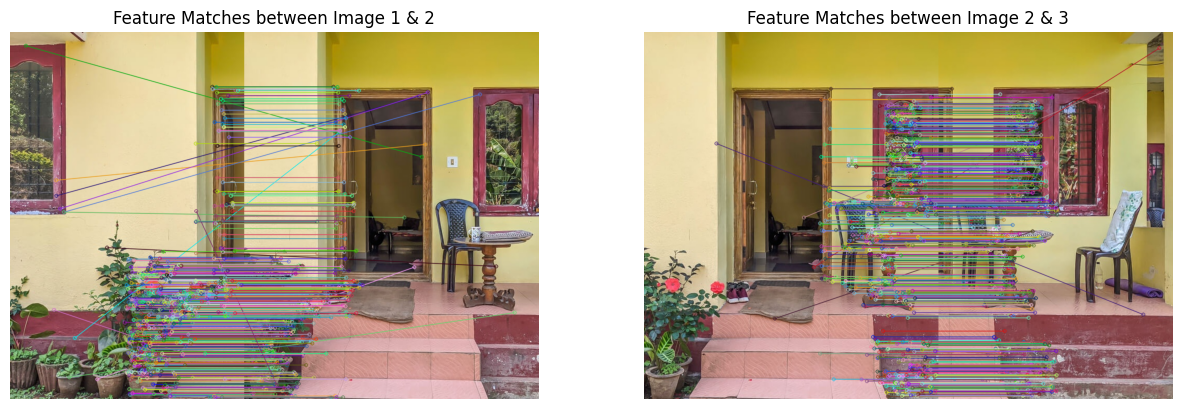

{'Matches between Image 1 & 2': 627, 'Matches between Image 2 & 3': 656}


In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load the cropped images
image_paths = [
    "cropped_part1.jpg",
    "cropped_part2.jpg",
    "cropped_part3.jpg"
]

# Read images using OpenCV
images = [cv2.imread(path) for path in image_paths]

# Convert images to grayscale for feature detection
gray_images = [cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) for img in images]

# Initialize SIFT detector for robust feature detection
sift = cv2.SIFT_create()

# Detect keypoints and compute descriptors
keypoints_descriptors = [sift.detectAndCompute(gray, None) for gray in gray_images]
keypoints = [kp_desc[0] for kp_desc in keypoints_descriptors]
descriptors = [kp_desc[1] for kp_desc in keypoints_descriptors]

# Draw keypoints on images
keypoint_images = [cv2.drawKeypoints(images[i], keypoints[i], None, color=(0, 255, 0)) for i in range(3)]

# Convert to RGB for display
keypoint_images_rgb = [cv2.cvtColor(kp_img, cv2.COLOR_BGR2RGB) for kp_img in keypoint_images]

# Display images with detected keypoints
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
for i in range(3):
    axs[i].imshow(keypoint_images_rgb[i])
    axs[i].set_title(f"Keypoints in Image {i+1}")
    axs[i].axis("off")
plt.show()

# Step 2: Feature Matching between Consecutive Images

# Use FLANN-based matcher for better accuracy with SIFT features
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50)
flann = cv2.FlannBasedMatcher(index_params, search_params)

# Match descriptors
matches1to2 = flann.knnMatch(descriptors[0], descriptors[1], k=2)
matches2to3 = flann.knnMatch(descriptors[1], descriptors[2], k=2)

# Apply Lowe's ratio test to filter good matches
good1to2 = [m for m, n in matches1to2 if m.distance < 0.7 * n.distance]
good2to3 = [m for m, n in matches2to3 if m.distance < 0.7 * n.distance]

# Step 3: Visualize Feature Matches
match_vis1to2 = cv2.drawMatches(images[0], keypoints[0], images[1], keypoints[1], good1to2, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
match_vis2to3 = cv2.drawMatches(images[1], keypoints[1], images[2], keypoints[2], good2to3, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Convert to RGB for display
match_vis1to2_rgb = cv2.cvtColor(match_vis1to2, cv2.COLOR_BGR2RGB)
match_vis2to3_rgb = cv2.cvtColor(match_vis2to3, cv2.COLOR_BGR2RGB)

# Display the matches
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].imshow(match_vis1to2_rgb)
axs[0].set_title("Feature Matches between Image 1 & 2")
axs[1].imshow(match_vis2to3_rgb)
axs[1].set_title("Feature Matches between Image 2 & 3")

for ax in axs:
    ax.axis("off")

plt.show()

# Step 4: Validate the match counts
match_counts = {
    "Matches between Image 1 & 2": len(good1to2),
    "Matches between Image 2 & 3": len(good2to3)
}

print(match_counts)
